# Importing the needed liabraries

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

In [620]:
# importing the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Having a glance at the data

In [621]:
df.shape

(730, 16)

In [622]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [624]:
# Removing features that are unrelated
df = df.drop(columns=['instant', 'dteday', 'casual' , 'registered'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Preprocessing the data

In [625]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [626]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [627]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [628]:
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Visualizing the data

<Axes: xlabel='season', ylabel='cnt'>

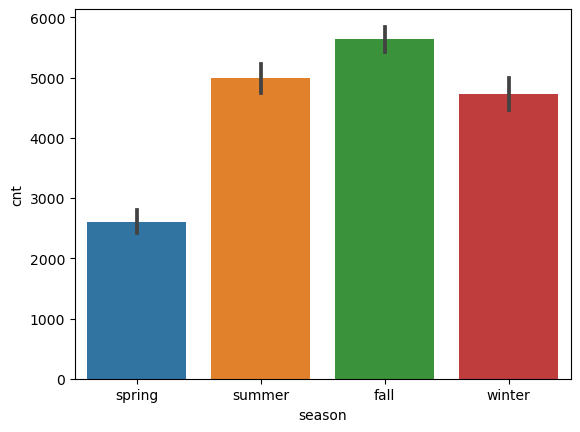

In [629]:
sns.barplot(x = 'season',y = 'cnt',data=df)

We can see that people prefer to use bikes in the season of fall the most and spring the least

<Axes: xlabel='weathersit', ylabel='cnt'>

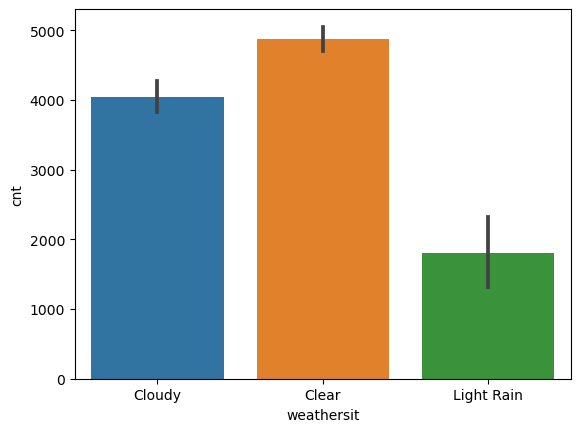

In [630]:
sns.barplot(x = 'weathersit',y = 'cnt',data=df)

We can see that it has a high change for a person to rent bike on a clear day as compared to rainy day also we do not have data on heavy rain day

<Axes: xlabel='holiday', ylabel='cnt'>

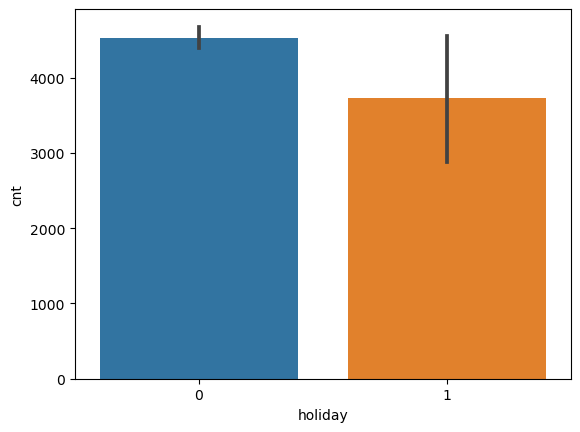

In [631]:
sns.barplot(x = 'holiday',y = 'cnt',data=df)

<Axes: xlabel='workingday', ylabel='cnt'>

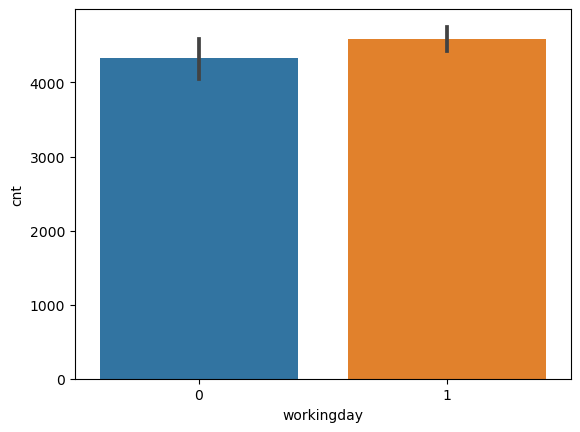

In [632]:
sns.barplot(x = 'workingday',y = 'cnt',data=df)

It is seen that people are usually renting bikes on a working day more compared to holiday so they must be using it for travelling to offices

<Axes: xlabel='year', ylabel='cnt'>

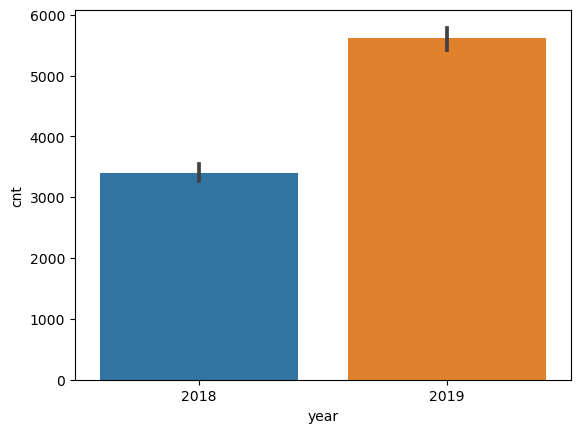

In [633]:
years = {1:2019,0:2018}
df['year'] = df['yr'].map(years)
sns.barplot(x = 'year',y = 'cnt',data=df)

We can clearly see that sales have increased almost 1.5 times in year 2019 as compared to 2018

<Axes: xlabel='month', ylabel='cnt'>

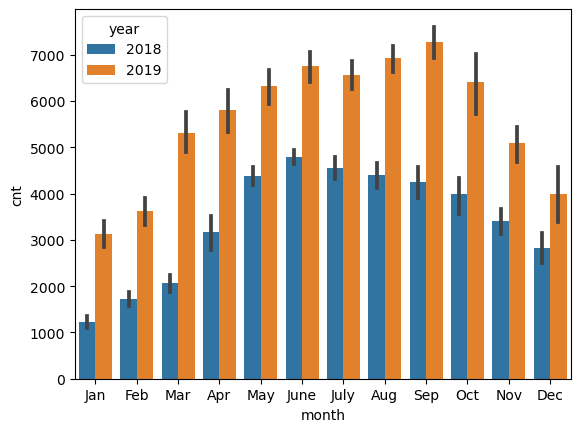

In [634]:
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month'] = df['mnth'].map(months)
sns.barplot(x = 'month',hue='year',y = 'cnt',data=df)

Sales are more in the month jan to sep than they decrease a bit

<Axes: xlabel='weekday_new', ylabel='cnt'>

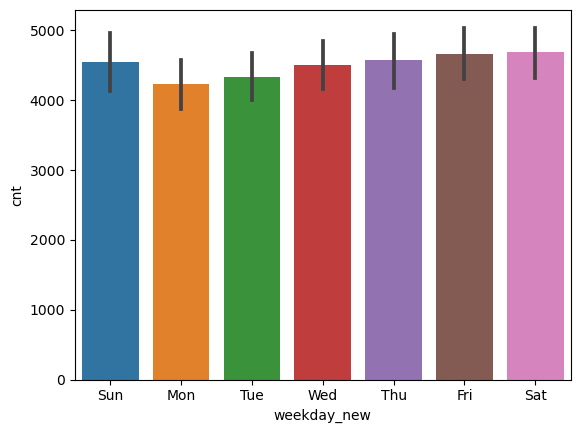

In [635]:
weekday = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['weekday_new'] = df['weekday'].map(weekday)
sns.barplot(x = 'weekday_new',y = 'cnt',data=df)

Data is almost similar and monday has least rental of all

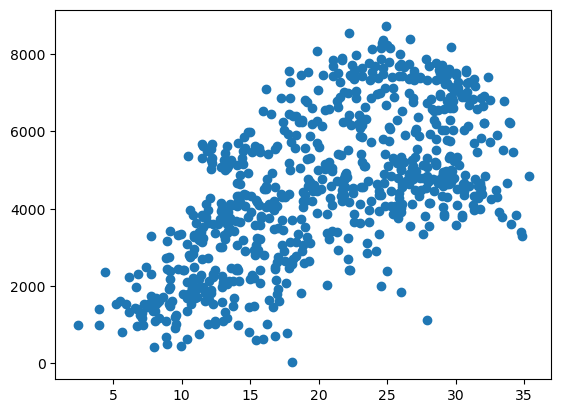

In [636]:
plt.scatter(x = 'temp',y = 'cnt',data=df)

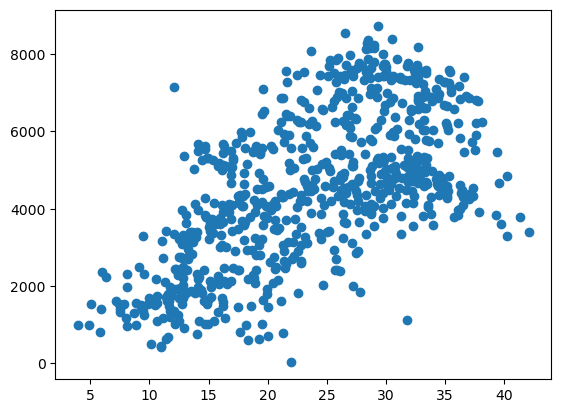

In [637]:
plt.scatter(x='atemp',y='cnt',data=df)

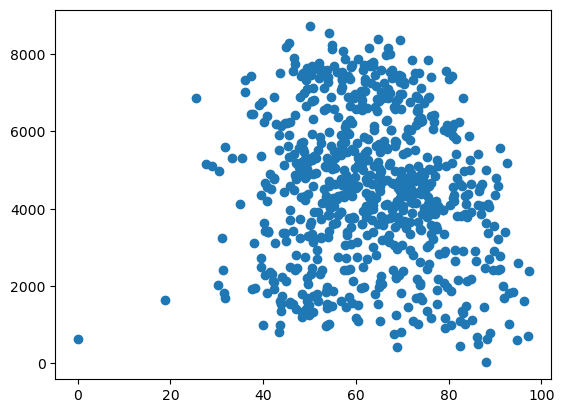

In [638]:
plt.scatter(x='hum',y='cnt',data=df)

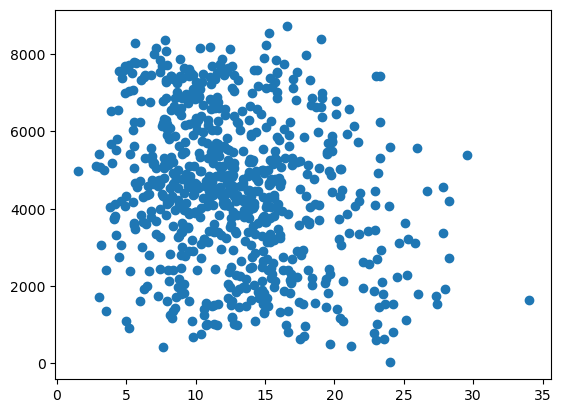

In [639]:
plt.scatter(x='windspeed',y='cnt',data=df)

Humidity and windspeed has lot of variance

C:\Users\garvit.minocha\AppData\Local\Temp\ipykernel_20752\672973037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'])


<Axes: xlabel='cnt', ylabel='Density'>

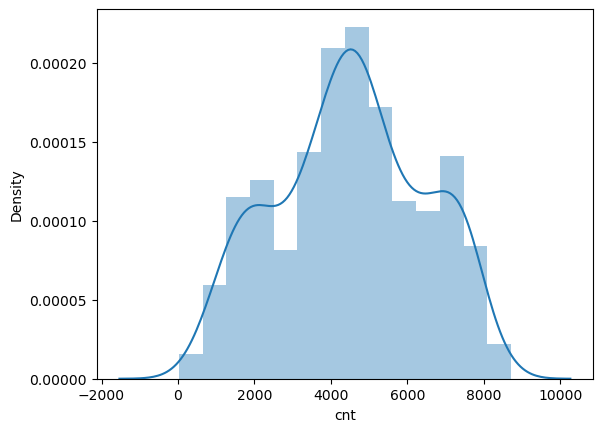

In [640]:
sns.distplot(df['cnt'])

It has a normal distribution

C:\Users\garvit.minocha\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


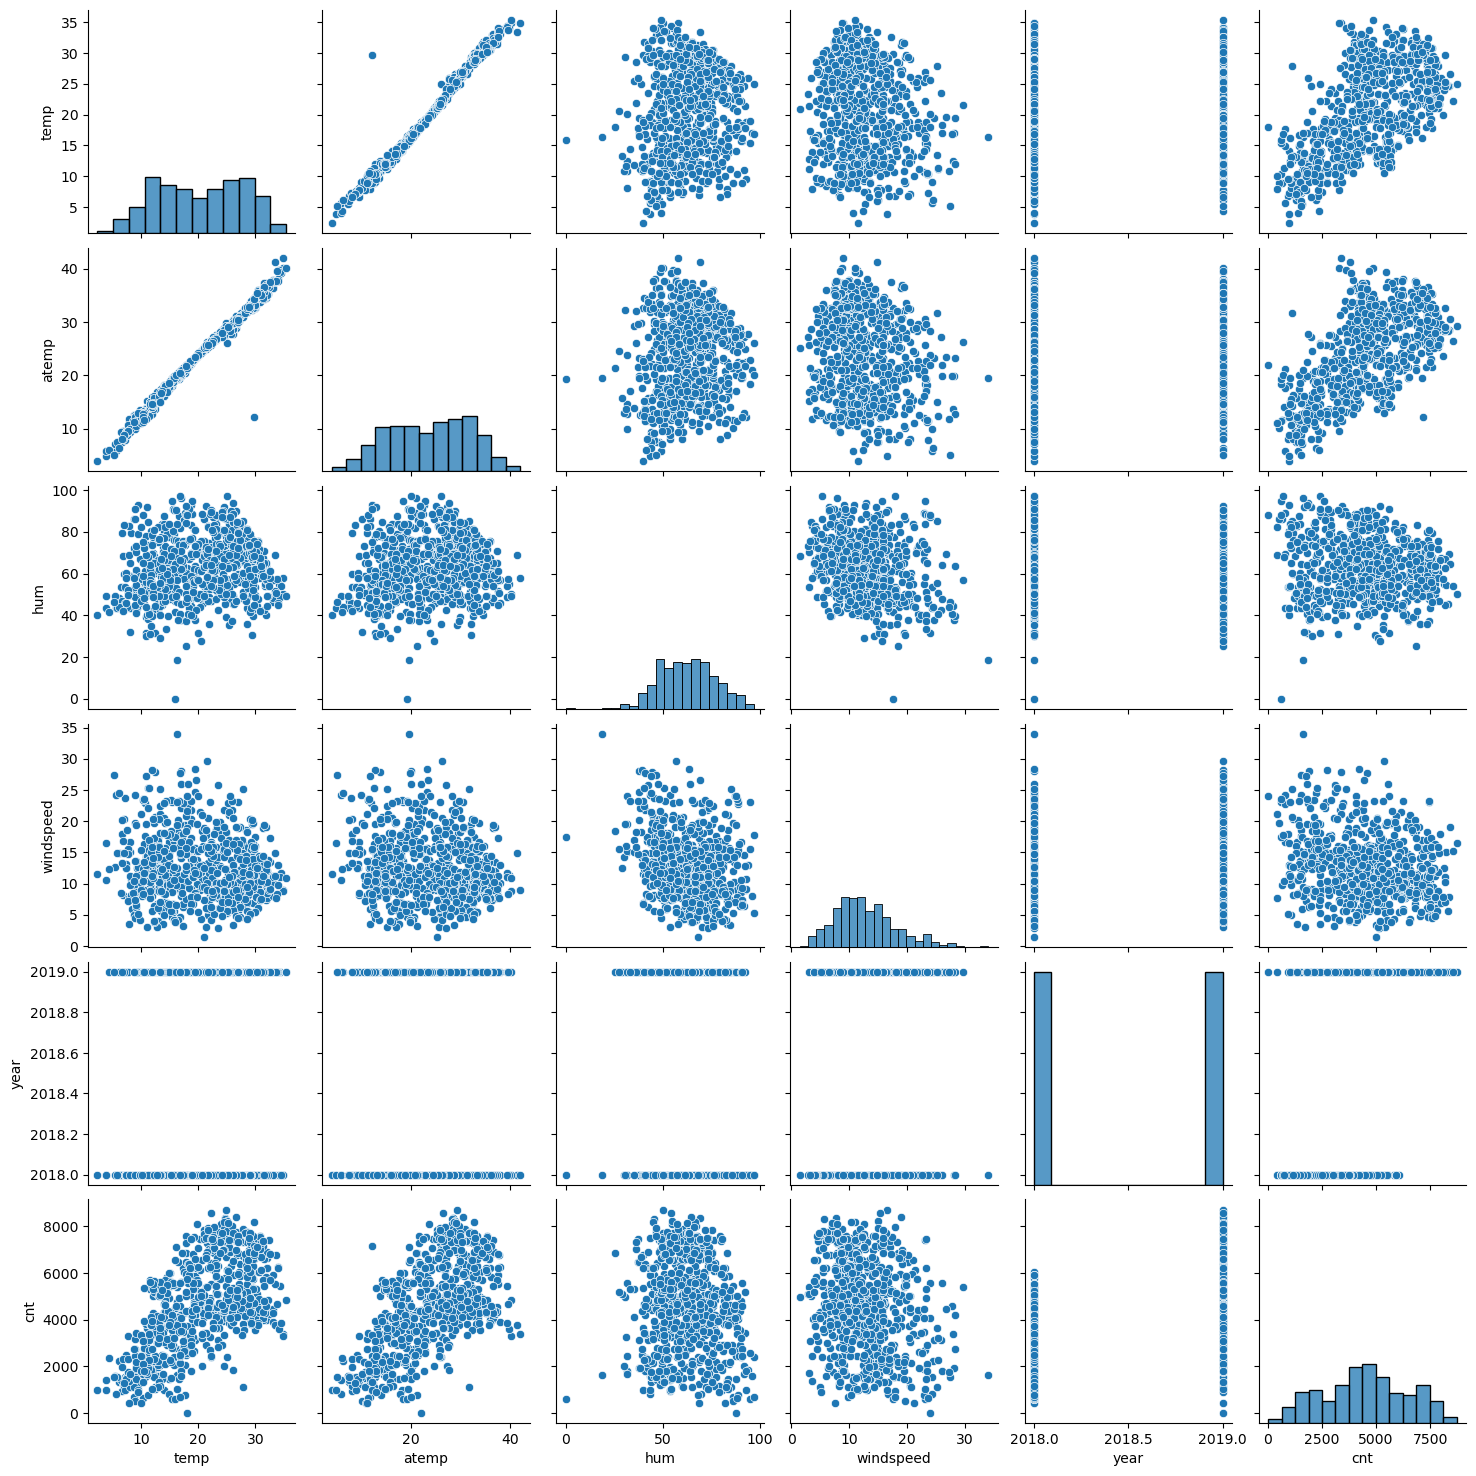

In [641]:
sns.pairplot(df[['temp','atemp','hum','windspeed','year','cnt']])

<Axes: >

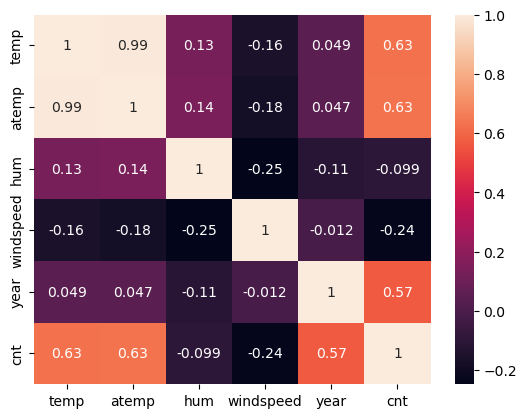

In [642]:
sns.heatmap(df[['temp','atemp','hum','windspeed','year','cnt']].corr(),annot=True)

We can clearly see that temp and atemp are highly corelated and thus can be removed

In [643]:
# Removing temp
df.drop('temp',axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,year,month,weekday_new
0,spring,0,1,0,6,0,Cloudy,18.18125,80.5833,10.749882,985,2018,Jan,Sun
1,spring,0,1,0,0,0,Cloudy,17.68695,69.6087,16.652113,801,2018,Jan,Mon
2,spring,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349,2018,Jan,Tue
3,spring,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562,2018,Jan,Wed
4,spring,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600,2018,Jan,Thu


# Processing catagorical variables

In [644]:
seasons = pd.get_dummies(df['season'],drop_first=True)
weather= pd.get_dummies(df['weathersit'],drop_first=True)
month= pd.get_dummies(df['month'],drop_first=True)
week_day= pd.get_dummies(df['weekday_new'],drop_first=True)
year= pd.get_dummies(df['year'],drop_first=True)

In [645]:
df= pd.concat([df,seasons,weather,month,week_day,year],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
0,spring,0,1,0,6,0,Cloudy,18.18125,80.5833,10.749882,...,False,False,False,False,False,True,False,False,False,False
1,spring,0,1,0,0,0,Cloudy,17.68695,69.6087,16.652113,...,False,False,False,True,False,False,False,False,False,False
2,spring,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,...,False,False,False,False,False,False,False,False,True,False
4,spring,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,...,False,False,False,False,False,False,True,False,False,False


In [646]:
df.drop(['season','weathersit','weekday_new','month','year','yr','mnth','weekday','workingday'],axis=1,inplace=True)
df.head()

,holiday,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Light Rain,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
0,0,18.18125,80.5833,10.749882,985,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0,17.68695,69.6087,16.652113,801,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,0,9.47025,43.7273,16.636703,1349,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,10.60610,59.0435,10.739832,1562,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,11.46350,43.6957,12.522300,1600,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [647]:
df = df.astype(float)
df

,holiday,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Light Rain,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
0,0.0,18.18125,80.5833,10.749882,985.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,17.68695,69.6087,16.652113,801.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.47025,43.7273,16.636703,1349.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,10.60610,59.0435,10.739832,1562.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,11.46350,43.6957,12.522300,1600.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,11.33210,65.2917,23.458911,2114.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
726,0.0,12.75230,59.0000,10.416557,3095.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
727,0.0,12.12000,75.2917,8.333661,1341.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,0.0,11.58500,48.3333,23.500518,1796.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Spliting and Scaling the data

In [648]:
np.random.seed(100)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [649]:
scaler= MinMaxScaler()

In [650]:
# Apply scaler() to all the columns except the'dummy' variables.

variables=['atemp','hum','windspeed','cnt']

df_train[variables]= scaler.fit_transform(df_train[variables])

In [651]:
df_train.head()

,holiday,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Light Rain,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2019
653,0.0,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
576,0.0,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
426,0.0,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,0.0,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
482,0.0,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [652]:
# Creating y
y_train = df_train.pop('cnt')
X_train = df_train

In [653]:
# Creating a model with all the variables

X_train_xm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_xm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          4.12e-180
Time:                        22:40:54   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3496      0.044      7.911      0.000       0.263       0.436
holiday       -0.0798      0.027     -2.982      0.003      -0.132      -0.027
atemp          0.4195      0.045      9.248      0.000       0.330       0.509
hum           -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed     -0.1686      0.026     -6.506      0.000      -0.219      -0.118
spring        -0.0551      0.030     -1.826      0.068      -0.114       0.004
summer         0.0308      0.026      1.171      0.242      -0.021       0.083
winter         0.0998      0.028      3.553      0.000       0.045       0.155
Cloudy        -0.0626      0.011     -5.961      0.000      -0.083      -0.042
Light Rain    -0.2546      0.027     -9.566      0.000      -0.307      -0.202
Aug            0.0369      0.033      1.103      0.270      -0.029       0.103
Dec           -0.0540      0.034     -1.603      0.110      -0.120       0.012
Feb           -0.0405      0.033     -1.226      0.221      -0.105       0.024
Jan           -0.0734      0.034     -2.187      0.029      -0.139      -0.007
July          -0.0201      0.035     -0.578      0.563      -0.088       0.048
June           0.0178      0.025      0.726      0.468      -0.030       0.066
Mar           -0.0006      0.025     -0.026      0.979      -0.049       0.048
May            0.0358      0.021      1.716      0.087      -0.005       0.077
Nov           -0.0477      0.037     -1.303      0.193      -0.120       0.024
Oct            0.0078      0.036      0.216      0.829      -0.063       0.079
Sep            0.0915      0.032      2.846      0.005       0.028       0.155
Mon           -0.0457      0.015     -2.995      0.003      -0.076      -0.016
Sat            0.0132      0.016      0.843      0.399      -0.018       0.044
Sun            0.0090      0.015      0.605      0.545      -0.020       0.038
Thu            0.0051      0.015      0.345      0.730      -0.024       0.034
Tue           -0.0131      0.015     -0.862      0.389      -0.043       0.017
Wed           -0.0090      0.016     -0.577      0.564      -0.039       0.022
2019           0.2342      0.008     28.937      0.000       0.218       0.250
==============================================================================
Omnibus:                       86.243   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.880
Skew:                          -0.790   Prob(JB):                     8.25e-58
Kurtosis:                       6.142   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [654]:
# Computing VIF
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,37.74
1,atemp,32.24
4,spring,11.92
6,winter,11.85
5,summer,6.97
18,Oct,6.37
17,Nov,6.03
9,Aug,5.47
12,Jan,5.15
13,July,4.97


In [655]:
# Removing Spring as it has high p- value and VIF
X=X.drop('spring',axis=1)

In [656]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.06e-180
Time:                        22:40:55   Log-Likelihood:                 522.08
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     483   BIC:                            -875.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3173      0.041      7.816      0.000       0.238       0.397
holiday       -0.0808      0.027     -3.012      0.003      -0.134      -0.028
atemp          0.4282      0.045      9.468      0.000       0.339       0.517
hum           -0.1479      0.039     -3.811      0.000      -0.224      -0.072
windspeed     -0.1720      0.026     -6.637      0.000      -0.223      -0.121
summer         0.0622      0.020      3.116      0.002       0.023       0.101
winter         0.1305      0.023      5.789      0.000       0.086       0.175
Cloudy        -0.0620      0.011     -5.896      0.000      -0.083      -0.041
Light Rain    -0.2514      0.027     -9.444      0.000      -0.304      -0.199
Aug            0.0657      0.030      2.223      0.027       0.008       0.124
Dec           -0.0597      0.034     -1.773      0.077      -0.126       0.006
Feb           -0.0624      0.031     -2.026      0.043      -0.123      -0.002
Jan           -0.0949      0.032     -3.011      0.003      -0.157      -0.033
July           0.0081      0.031      0.258      0.797      -0.053       0.069
June           0.0270      0.024      1.121      0.263      -0.020       0.074
Mar           -0.0152      0.023     -0.649      0.517      -0.061       0.031
May            0.0344      0.021      1.645      0.101      -0.007       0.076
Nov           -0.0464      0.037     -1.264      0.207      -0.118       0.026
Oct            0.0079      0.036      0.218      0.827      -0.063       0.079
Sep            0.1142      0.030      3.844      0.000       0.056       0.173
Mon           -0.0466      0.015     -3.051      0.002      -0.077      -0.017
Sat            0.0128      0.016      0.819      0.413      -0.018       0.044
Sun            0.0076      0.015      0.510      0.611      -0.022       0.037
Thu            0.0042      0.015      0.281      0.779      -0.025       0.033
Tue           -0.0131      0.015     -0.856      0.392      -0.043       0.017
Wed           -0.0093      0.016     -0.600      0.549      -0.040       0.021
2019           0.2339      0.008     28.837      0.000       0.218       0.250
==============================================================================
Omnibus:                       82.888   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.122
Skew:                          -0.765   Prob(JB):                     1.32e-54
Kurtosis:                       6.055   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [657]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,36.25
1,atemp,31.95
5,winter,8.09
17,Oct,6.22
16,Nov,5.82
8,Aug,4.78
4,summer,4.76
3,windspeed,4.65
12,July,4.41
9,Dec,4.33


In [658]:
# Removing Oct as it has high p- value and VIF
X=X.drop('Oct',axis=1)

In [659]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.00e-181
Time:                        22:40:55   Log-Likelihood:                 522.06
No. Observations:                 510   AIC:                            -992.1
Df Residuals:                     484   BIC:                            -882.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3206      0.038      8.513      0.000       0.247       0.395
holiday       -0.0805      0.027     -3.007      0.003      -0.133      -0.028
atemp          0.4278      0.045      9.476      0.000       0.339       0.517
hum           -0.1469      0.038     -3.816      0.000      -0.223      -0.071
windspeed     -0.1719      0.026     -6.643      0.000      -0.223      -0.121
summer         0.0598      0.017      3.611      0.000       0.027       0.092
winter         0.1335      0.018      7.492      0.000       0.099       0.169
Cloudy        -0.0621      0.011     -5.912      0.000      -0.083      -0.041
Light Rain    -0.2512      0.027     -9.450      0.000      -0.303      -0.199
Aug            0.0621      0.024      2.541      0.011       0.014       0.110
Dec           -0.0656      0.020     -3.271      0.001      -0.105      -0.026
Feb           -0.0662      0.026     -2.579      0.010      -0.117      -0.016
Jan           -0.0987      0.026     -3.746      0.000      -0.150      -0.047
July           0.0045      0.027      0.169      0.866      -0.048       0.057
June           0.0250      0.022      1.125      0.261      -0.019       0.069
Mar           -0.0180      0.020     -0.921      0.358      -0.057       0.020
May            0.0332      0.020      1.652      0.099      -0.006       0.073
Nov           -0.0531      0.019     -2.737      0.006      -0.091      -0.015
Sep            0.1098      0.022      5.028      0.000       0.067       0.153
Mon           -0.0467      0.015     -3.056      0.002      -0.077      -0.017
Sat            0.0128      0.016      0.817      0.415      -0.018       0.044
Sun            0.0076      0.015      0.510      0.610      -0.022       0.037
Thu            0.0041      0.015      0.279      0.781      -0.025       0.033
Tue           -0.0131      0.015     -0.862      0.389      -0.043       0.017
Wed           -0.0094      0.016     -0.606      0.545      -0.040       0.021
2019           0.2338      0.008     28.882      0.000       0.218       0.250
==============================================================================
Omnibus:                       82.217   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.203
Skew:                          -0.760   Prob(JB):                     5.69e-54
Kurtosis:                       6.038   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [660]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.73
1,atemp,31.11
5,winter,4.54
3,windspeed,4.48
4,summer,3.73
8,Aug,3.58
12,July,3.43
11,Jan,2.47
17,Sep,2.37
13,June,2.34


In [661]:
# Removing July as it has high p- value
X=X.drop('July',axis=1)

In [662]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.87e-182
Time:                        22:40:56   Log-Likelihood:                 522.04
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     485   BIC:                            -888.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3213      0.037      8.588      0.000       0.248       0.395
holiday       -0.0808      0.027     -3.032      0.003      -0.133      -0.028
atemp          0.4316      0.039     10.982      0.000       0.354       0.509
hum           -0.1476      0.038     -3.863      0.000      -0.223      -0.073
windspeed     -0.1724      0.026     -6.704      0.000      -0.223      -0.122
summer         0.0586      0.015      3.942      0.000       0.029       0.088
winter         0.1320      0.015      8.529      0.000       0.102       0.162
Cloudy        -0.0620      0.010     -5.917      0.000      -0.083      -0.041
Light Rain    -0.2510      0.027     -9.462      0.000      -0.303      -0.199
Aug            0.0592      0.017      3.435      0.001       0.025       0.093
Dec           -0.0659      0.020     -3.306      0.001      -0.105      -0.027
Feb           -0.0673      0.025     -2.726      0.007      -0.116      -0.019
Jan           -0.0996      0.026     -3.867      0.000      -0.150      -0.049
June           0.0228      0.018      1.249      0.212      -0.013       0.059
Mar           -0.0192      0.018     -1.051      0.294      -0.055       0.017
May            0.0320      0.019      1.705      0.089      -0.005       0.069
Nov           -0.0532      0.019     -2.742      0.006      -0.091      -0.015
Sep            0.1076      0.017      6.209      0.000       0.074       0.142
Mon           -0.0466      0.015     -3.055      0.002      -0.077      -0.017
Sat            0.0129      0.016      0.824      0.410      -0.018       0.044
Sun            0.0077      0.015      0.520      0.604      -0.021       0.037
Thu            0.0041      0.015      0.280      0.780      -0.025       0.033
Tue           -0.0130      0.015     -0.857      0.392      -0.043       0.017
Wed           -0.0093      0.016     -0.602      0.547      -0.040       0.021
2019           0.2337      0.008     28.961      0.000       0.218       0.250
==============================================================================
Omnibus:                       81.749   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.420
Skew:                          -0.756   Prob(JB):                     1.39e-53
Kurtosis:                       6.028   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [663]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.57
1,atemp,19.17
3,windspeed,4.46
5,winter,3.46
4,summer,3.03
11,Jan,2.39
6,Cloudy,2.32
21,Tue,2.16
20,Thu,2.13
23,2019,2.11


In [664]:
# Removing Mar as it has high p- value
X=X.drop('Mar',axis=1)

In [665]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.93e-183
Time:                        22:40:57   Log-Likelihood:                 521.46
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     486   BIC:                            -893.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3029      0.033      9.164      0.000       0.238       0.368
holiday       -0.0799      0.027     -3.000      0.003      -0.132      -0.028
atemp          0.4520      0.034     13.236      0.000       0.385       0.519
hum           -0.1508      0.038     -3.959      0.000      -0.226      -0.076
windspeed     -0.1720      0.026     -6.688      0.000      -0.223      -0.121
summer         0.0625      0.014      4.341      0.000       0.034       0.091
winter         0.1389      0.014      9.891      0.000       0.111       0.166
Cloudy        -0.0617      0.010     -5.891      0.000      -0.082      -0.041
Light Rain    -0.2493      0.026     -9.414      0.000      -0.301      -0.197
Aug            0.0638      0.017      3.837      0.000       0.031       0.097
Dec           -0.0576      0.018     -3.147      0.002      -0.094      -0.022
Feb           -0.0536      0.021     -2.557      0.011      -0.095      -0.012
Jan           -0.0842      0.021     -3.976      0.000      -0.126      -0.043
June           0.0251      0.018      1.382      0.167      -0.011       0.061
May            0.0352      0.018      1.906      0.057      -0.001       0.072
Nov           -0.0482      0.019     -2.563      0.011      -0.085      -0.011
Sep            0.1125      0.017      6.753      0.000       0.080       0.145
Mon           -0.0452      0.015     -2.975      0.003      -0.075      -0.015
Sat            0.0139      0.016      0.891      0.373      -0.017       0.045
Sun            0.0084      0.015      0.564      0.573      -0.021       0.038
Thu            0.0046      0.015      0.314      0.754      -0.024       0.034
Tue           -0.0124      0.015     -0.814      0.416      -0.042       0.017
Wed           -0.0086      0.016     -0.555      0.579      -0.039       0.022
2019           0.2333      0.008     28.942      0.000       0.217       0.249
==============================================================================
Omnibus:                       78.067   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.679
Skew:                          -0.739   Prob(JB):                     1.20e-48
Kurtosis:                       5.864   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [666]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.82
1,atemp,17.46
3,windspeed,4.19
5,winter,3.09
4,summer,3.00
6,Cloudy,2.27
20,Tue,2.15
19,Thu,2.11
22,2019,2.09
18,Sun,2.06


In [667]:
# Removing June as it has high p- value
X=X.drop('June',axis=1)

In [668]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          6.68e-184
Time:                        22:40:57   Log-Likelihood:                 520.46
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     487   BIC:                            -897.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.033      9.067      0.000       0.234       0.363
holiday       -0.0812      0.027     -3.047      0.002      -0.134      -0.029
atemp          0.4699      0.032     14.859      0.000       0.408       0.532
hum           -0.1551      0.038     -4.081      0.000      -0.230      -0.080
windspeed     -0.1739      0.026     -6.765      0.000      -0.224      -0.123
summer         0.0681      0.014      4.926      0.000       0.041       0.095
winter         0.1381      0.014      9.835      0.000       0.111       0.166
Cloudy        -0.0616      0.010     -5.869      0.000      -0.082      -0.041
Light Rain    -0.2494      0.027     -9.407      0.000      -0.301      -0.197
Aug            0.0583      0.016      3.607      0.000       0.027       0.090
Dec           -0.0552      0.018     -3.025      0.003      -0.091      -0.019
Feb           -0.0507      0.021     -2.431      0.015      -0.092      -0.010
Jan           -0.0802      0.021     -3.820      0.000      -0.121      -0.039
May            0.0265      0.017      1.523      0.128      -0.008       0.061
Nov           -0.0464      0.019     -2.471      0.014      -0.083      -0.010
Sep            0.1089      0.016      6.611      0.000       0.077       0.141
Mon           -0.0450      0.015     -2.963      0.003      -0.075      -0.015
Sat            0.0138      0.016      0.881      0.379      -0.017       0.044
Sun            0.0085      0.015      0.573      0.567      -0.021       0.038
Thu            0.0052      0.015      0.352      0.725      -0.024       0.034
Tue           -0.0122      0.015     -0.800      0.424      -0.042       0.018
Wed           -0.0095      0.016     -0.613      0.540      -0.040       0.021
2019           0.2326      0.008     28.885      0.000       0.217       0.248
==============================================================================
Omnibus:                       77.241   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.780
Skew:                          -0.741   Prob(JB):                     1.03e-46
Kurtosis:                       5.787   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [669]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.07
1,atemp,14.86
3,windspeed,4.14
5,winter,3.08
4,summer,2.78
6,Cloudy,2.27
19,Tue,2.15
18,Thu,2.11
21,2019,2.08
17,Sun,2.06


In [670]:
# Removing May as it has high p- value
X=X.drop('May',axis=1)

In [671]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.82e-184
Time:                        22:40:57   Log-Likelihood:                 519.25
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     488   BIC:                            -901.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2911      0.033      8.927      0.000       0.227       0.355
holiday       -0.0816      0.027     -3.056      0.002      -0.134      -0.029
atemp          0.4755      0.031     15.116      0.000       0.414       0.537
hum           -0.1470      0.038     -3.900      0.000      -0.221      -0.073
windspeed     -0.1751      0.026     -6.808      0.000      -0.226      -0.125
summer         0.0773      0.012      6.212      0.000       0.053       0.102
winter         0.1380      0.014      9.814      0.000       0.110       0.166
Cloudy        -0.0619      0.011     -5.891      0.000      -0.082      -0.041
Light Rain    -0.2519      0.026     -9.510      0.000      -0.304      -0.200
Aug            0.0570      0.016      3.528      0.000       0.025       0.089
Dec           -0.0540      0.018     -2.958      0.003      -0.090      -0.018
Feb           -0.0484      0.021     -2.323      0.021      -0.089      -0.007
Jan           -0.0779      0.021     -3.714      0.000      -0.119      -0.037
Nov           -0.0452      0.019     -2.406      0.017      -0.082      -0.008
Sep            0.1078      0.016      6.543      0.000       0.075       0.140
Mon           -0.0452      0.015     -2.970      0.003      -0.075      -0.015
Sat            0.0141      0.016      0.898      0.370      -0.017       0.045
Sun            0.0079      0.015      0.534      0.594      -0.021       0.037
Thu            0.0054      0.015      0.365      0.715      -0.024       0.034
Tue           -0.0128      0.015     -0.839      0.402      -0.043       0.017
Wed           -0.0090      0.016     -0.582      0.561      -0.040       0.021
2019           0.2322      0.008     28.809      0.000       0.216       0.248
==============================================================================
Omnibus:                       75.568   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.739
Skew:                          -0.741   Prob(JB):                     1.15e-43
Kurtosis:                       5.667   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,26.95
1,atemp,14.83
3,windspeed,4.07
5,winter,3.08
4,summer,2.30
6,Cloudy,2.27
18,Tue,2.14
17,Thu,2.11
20,2019,2.07
16,Sun,2.05


In [673]:
# Removing Thu as it has high p- value
X=X.drop('Thu',axis=1)

In [674]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.65e-185
Time:                        22:40:58   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     489   BIC:                            -907.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2937      0.032      9.233      0.000       0.231       0.356
holiday       -0.0820      0.027     -3.079      0.002      -0.134      -0.030
atemp          0.4755      0.031     15.130      0.000       0.414       0.537
hum           -0.1465      0.038     -3.894      0.000      -0.220      -0.073
windspeed     -0.1752      0.026     -6.816      0.000      -0.226      -0.125
summer         0.0774      0.012      6.232      0.000       0.053       0.102
winter         0.1382      0.014      9.837      0.000       0.111       0.166
Cloudy        -0.0618      0.010     -5.893      0.000      -0.082      -0.041
Light Rain    -0.2518      0.026     -9.514      0.000      -0.304      -0.200
Aug            0.0570      0.016      3.531      0.000       0.025       0.089
Dec           -0.0542      0.018     -2.976      0.003      -0.090      -0.018
Feb           -0.0482      0.021     -2.316      0.021      -0.089      -0.007
Jan           -0.0778      0.021     -3.713      0.000      -0.119      -0.037
Nov           -0.0454      0.019     -2.420      0.016      -0.082      -0.009
Sep            0.1078      0.016      6.547      0.000       0.075       0.140
Mon           -0.0482      0.013     -3.735      0.000      -0.074      -0.023
Sat            0.0111      0.013      0.829      0.408      -0.015       0.037
Sun            0.0050      0.013      0.401      0.689      -0.020       0.030
Tue           -0.0157      0.013     -1.206      0.228      -0.041       0.010
Wed           -0.0120      0.013     -0.907      0.365      -0.038       0.014
2019           0.2322      0.008     28.837      0.000       0.216       0.248
==============================================================================
Omnibus:                       76.036   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.466
Skew:                          -0.744   Prob(JB):                     4.86e-44
Kurtosis:                       5.678   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [675]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.92
1,atemp,14.59
3,windspeed,4.00
5,winter,3.07
4,summer,2.28
6,Cloudy,2.26
19,2019,2.07
11,Jan,1.94
12,Nov,1.86
9,Dec,1.64


In [676]:
# Removing Sun as it has high p- value
X=X.drop('Sun',axis=1)

In [677]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.46e-186
Time:                        22:40:58   Log-Likelihood:                 519.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     490   BIC:                            -913.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2958      0.031      9.439      0.000       0.234       0.357
holiday       -0.0823      0.027     -3.092      0.002      -0.135      -0.030
atemp          0.4752      0.031     15.138      0.000       0.414       0.537
hum           -0.1470      0.038     -3.913      0.000      -0.221      -0.073
windspeed     -0.1748      0.026     -6.812      0.000      -0.225      -0.124
summer         0.0773      0.012      6.231      0.000       0.053       0.102
winter         0.1384      0.014      9.870      0.000       0.111       0.166
Cloudy        -0.0617      0.010     -5.888      0.000      -0.082      -0.041
Light Rain    -0.2520      0.026     -9.534      0.000      -0.304      -0.200
Aug            0.0571      0.016      3.539      0.000       0.025       0.089
Dec           -0.0542      0.018     -2.980      0.003      -0.090      -0.018
Feb           -0.0484      0.021     -2.326      0.020      -0.089      -0.008
Jan           -0.0779      0.021     -3.720      0.000      -0.119      -0.037
Nov           -0.0458      0.019     -2.447      0.015      -0.083      -0.009
Sep            0.1077      0.016      6.546      0.000       0.075       0.140
Mon           -0.0499      0.012     -4.114      0.000      -0.074      -0.026
Sat            0.0094      0.013      0.738      0.461      -0.016       0.034
Tue           -0.0174      0.012     -1.418      0.157      -0.041       0.007
Wed           -0.0137      0.012     -1.098      0.273      -0.038       0.011
2019           0.2321      0.008     28.860      0.000       0.216       0.248
==============================================================================
Omnibus:                       74.743   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.559
Skew:                          -0.730   Prob(JB):                     1.26e-43
Kurtosis:                       5.677   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [678]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.75
1,atemp,14.51
3,windspeed,3.91
5,winter,3.05
4,summer,2.28
6,Cloudy,2.26
18,2019,2.07
11,Jan,1.93
12,Nov,1.86
9,Dec,1.63


In [679]:
# Removing Sat as it has high p- value
X=X.drop('Sat',axis=1)

In [680]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.53e-187
Time:                        22:40:58   Log-Likelihood:                 518.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     491   BIC:                            -919.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.031      9.596      0.000       0.237       0.360
holiday       -0.0818      0.027     -3.078      0.002      -0.134      -0.030
atemp          0.4751      0.031     15.142      0.000       0.413       0.537
hum           -0.1477      0.038     -3.932      0.000      -0.221      -0.074
windspeed     -0.1752      0.026     -6.832      0.000      -0.226      -0.125
summer         0.0771      0.012      6.216      0.000       0.053       0.101
winter         0.1384      0.014      9.875      0.000       0.111       0.166
Cloudy        -0.0611      0.010     -5.853      0.000      -0.082      -0.041
Light Rain    -0.2533      0.026     -9.604      0.000      -0.305      -0.201
Aug            0.0571      0.016      3.541      0.000       0.025       0.089
Dec           -0.0545      0.018     -2.995      0.003      -0.090      -0.019
Feb           -0.0483      0.021     -2.323      0.021      -0.089      -0.007
Jan           -0.0782      0.021     -3.739      0.000      -0.119      -0.037
Nov           -0.0465      0.019     -2.490      0.013      -0.083      -0.010
Sep            0.1073      0.016      6.530      0.000       0.075       0.140
Mon           -0.0520      0.012     -4.407      0.000      -0.075      -0.029
Tue           -0.0195      0.012     -1.638      0.102      -0.043       0.004
Wed           -0.0158      0.012     -1.302      0.194      -0.040       0.008
2019           0.2321      0.008     28.870      0.000       0.216       0.248
==============================================================================
Omnibus:                       74.563   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.738
Skew:                          -0.727   Prob(JB):                     1.15e-43
Kurtosis:                       5.682   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [681]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.65
1,atemp,14.45
3,windspeed,3.90
5,winter,3.05
4,summer,2.28
6,Cloudy,2.26
17,2019,2.07
11,Jan,1.92
12,Nov,1.86
9,Dec,1.63


In [682]:
# Removing Tue as it has high p- value
X=X.drop('Tue',axis=1)

In [683]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          4.50e-188
Time:                        22:40:59   Log-Likelihood:                 517.42
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     492   BIC:                            -922.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2968      0.031      9.531      0.000       0.236       0.358
holiday       -0.0934      0.026     -3.638      0.000      -0.144      -0.043
atemp          0.4756      0.031     15.132      0.000       0.414       0.537
hum           -0.1506      0.038     -4.009      0.000      -0.224      -0.077
windspeed     -0.1753      0.026     -6.824      0.000      -0.226      -0.125
summer         0.0768      0.012      6.182      0.000       0.052       0.101
winter         0.1373      0.014      9.791      0.000       0.110       0.165
Cloudy        -0.0607      0.010     -5.805      0.000      -0.081      -0.040
Light Rain    -0.2518      0.026     -9.538      0.000      -0.304      -0.200
Aug            0.0575      0.016      3.559      0.000       0.026       0.089
Dec           -0.0536      0.018     -2.946      0.003      -0.089      -0.018
Feb           -0.0483      0.021     -2.318      0.021      -0.089      -0.007
Jan           -0.0783      0.021     -3.738      0.000      -0.119      -0.037
Nov           -0.0449      0.019     -2.403      0.017      -0.082      -0.008
Sep            0.1081      0.016      6.574      0.000       0.076       0.140
Mon           -0.0482      0.012     -4.159      0.000      -0.071      -0.025
Wed           -0.0121      0.012     -1.012      0.312      -0.036       0.011
2019           0.2312      0.008     28.776      0.000       0.215       0.247
==============================================================================
Omnibus:                       71.843   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.711
Skew:                          -0.694   Prob(JB):                     5.24e-43
Kurtosis:                       5.690   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [684]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.47
1,atemp,14.45
3,windspeed,3.90
5,winter,3.04
4,summer,2.28
6,Cloudy,2.26
16,2019,2.06
11,Jan,1.92
12,Nov,1.85
9,Dec,1.63


In [685]:
# Removing Wed as it has high p- value
X=X.drop('Wed',axis=1)

In [686]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.64e-189
Time:                        22:40:59   Log-Likelihood:                 516.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     493   BIC:                            -927.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2961      0.031      9.510      0.000       0.235       0.357
holiday       -0.0914      0.026     -3.570      0.000      -0.142      -0.041
atemp          0.4746      0.031     15.108      0.000       0.413       0.536
hum           -0.1518      0.038     -4.043      0.000      -0.226      -0.078
windspeed     -0.1755      0.026     -6.831      0.000      -0.226      -0.125
summer         0.0767      0.012      6.174      0.000       0.052       0.101
winter         0.1370      0.014      9.770      0.000       0.109       0.165
Cloudy        -0.0604      0.010     -5.780      0.000      -0.081      -0.040
Light Rain    -0.2504      0.026     -9.497      0.000      -0.302      -0.199
Aug            0.0577      0.016      3.572      0.000       0.026       0.089
Dec           -0.0529      0.018     -2.905      0.004      -0.089      -0.017
Feb           -0.0493      0.021     -2.370      0.018      -0.090      -0.008
Jan           -0.0782      0.021     -3.732      0.000      -0.119      -0.037
Nov           -0.0450      0.019     -2.407      0.016      -0.082      -0.008
Sep            0.1085      0.016      6.596      0.000       0.076       0.141
Mon           -0.0462      0.011     -4.045      0.000      -0.069      -0.024
2019           0.2313      0.008     28.782      0.000       0.215       0.247
==============================================================================
Omnibus:                       71.386   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.007
Skew:                          -0.680   Prob(JB):                     6.11e-44
Kurtosis:                       5.741   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.38
1,atemp,14.42
3,windspeed,3.90
5,winter,3.04
4,summer,2.28
6,Cloudy,2.25
15,2019,2.06
11,Jan,1.92
12,Nov,1.85
9,Dec,1.63


In [688]:
# Removing July as it has high VIF
X=X.drop('hum',axis=1)

In [689]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_cm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.25e-186
Time:                        22:40:59   Log-Likelihood:                 508.58
No. Observations:                 510   AIC:                            -985.2
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2199      0.025      8.737      0.000       0.170       0.269
holiday       -0.0931      0.026     -3.584      0.000      -0.144      -0.042
atemp          0.4436      0.031     14.341      0.000       0.383       0.504
windspeed     -0.1497      0.025     -5.924      0.000      -0.199      -0.100
summer         0.0714      0.013      5.694      0.000       0.047       0.096
winter         0.1265      0.014      9.042      0.000       0.099       0.154
Cloudy        -0.0847      0.009     -9.745      0.000      -0.102      -0.068
Light Rain    -0.2931      0.025    -11.954      0.000      -0.341      -0.245
Aug            0.0551      0.016      3.361      0.001       0.023       0.087
Dec           -0.0605      0.018     -3.294      0.001      -0.097      -0.024
Feb           -0.0549      0.021     -2.606      0.009      -0.096      -0.014
Jan           -0.0881      0.021     -4.169      0.000      -0.130      -0.047
Nov           -0.0453      0.019     -2.384      0.017      -0.083      -0.008
Sep            0.1016      0.017      6.115      0.000       0.069       0.134
Mon           -0.0495      0.012     -4.280      0.000      -0.072      -0.027
2019           0.2348      0.008     28.953      0.000       0.219       0.251
==============================================================================
Omnibus:                       72.134   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.714
Skew:                          -0.688   Prob(JB):                     2.60e-44
Kurtosis:                       5.748   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [690]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.08
2,windspeed,3.84
4,winter,2.63
14,2019,2.06
3,summer,2.05
11,Nov,1.81
7,Aug,1.59
5,Cloudy,1.57
8,Dec,1.41
12,Sep,1.35


In [691]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr model.
y_train_pred = lr.predict(X_train_cm)

In [692]:
# We have our predicted scores now, and now we can take the residuals
res=y_train-y_train_pred

C:\Users\garvit.minocha\AppData\Local\Temp\ipykernel_20752\1661953409.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res),bins=20)


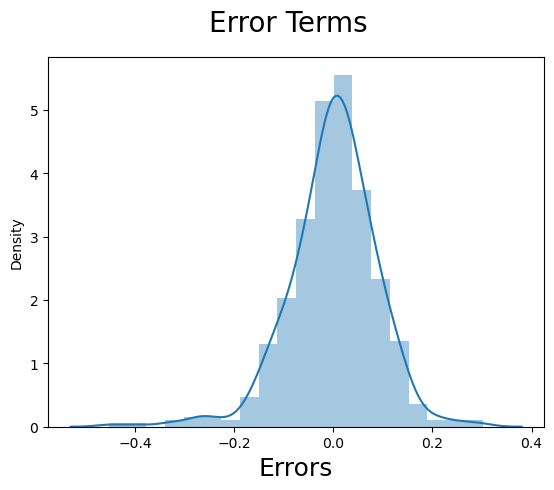

In [693]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

# Prediction on test

In [694]:
#  Transform the numerical variables 
variables=['atemp','hum','windspeed','cnt']

df_test[variables] = scaler.transform(df_test[variables])

In [695]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [696]:
X_test_m5 = sm.add_constant(X_test)

In [697]:
X_test_m5 = X_test_m5.drop(['spring','Oct','July','Mar','June','May','Thu','Sun','Sat','Tue','Wed','hum'], axis = 1)

In [698]:
# Making predictions using the fourth model
y_pred_m5 = lr.predict(X_test_m5)

In [699]:
r_squared = r2_score(y_test, y_pred_m5)
r_squared

0.8102265892033671

## The Rsq for training is .842 and the testing Rsq is .81 the difference is less than 5% so it is good to go